<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_prophet21 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving21.csv", header=None)
df_lstm30_s42 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30.csv", header=None)
# df_lstm30_s100 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s100.csv", header=None)
# df_lstm30_s224 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s224.csv", header=None)
# df_lstm30_s2024 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s2024.csv", header=None)

df_lstm30_s77 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving50.csv", header=None)
df_lstm30_s2024 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving49.csv", header=None)

sample_submit = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/sample_submit.csv", header=None)

In [42]:
df_prophet21.columns = ['datetime', 'y']
df_lstm30_s42.columns = ['datetime', 'y']
df_lstm30_s77.columns = ['datetime', 'y']
df_lstm30_s2024.columns = ['datetime', 'y']

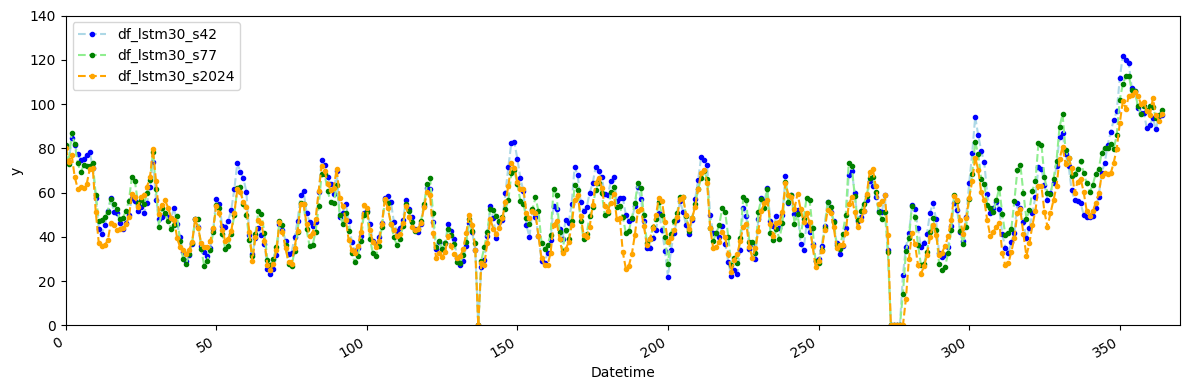

In [43]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_lstm30_s42['y'], ls='--', color='lightblue', label='df_lstm30_s42', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30_s77['y'], ls='--', color='lightgreen', label='df_lstm30_s77', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_lstm30_s2024['y'], ls='--', color='orange', label='df_lstm30_s2024', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [44]:
df_submit_0 = df_lstm30_s42.copy()
df_submit_0["ense_lstm_rand"] = np.nan
df_submit_0["ense_lstm_rand"] = df_lstm30_s77["y"]*0.45 + df_lstm30_s42["y"]*0.45 + df_lstm30_s2024["y"]*0.1
df_submit_0["ense_lstm_rand"].head()

,ense_lstm_rand
0,78.152945
1,73.494971
2,84.919122
3,80.404437
4,74.019275


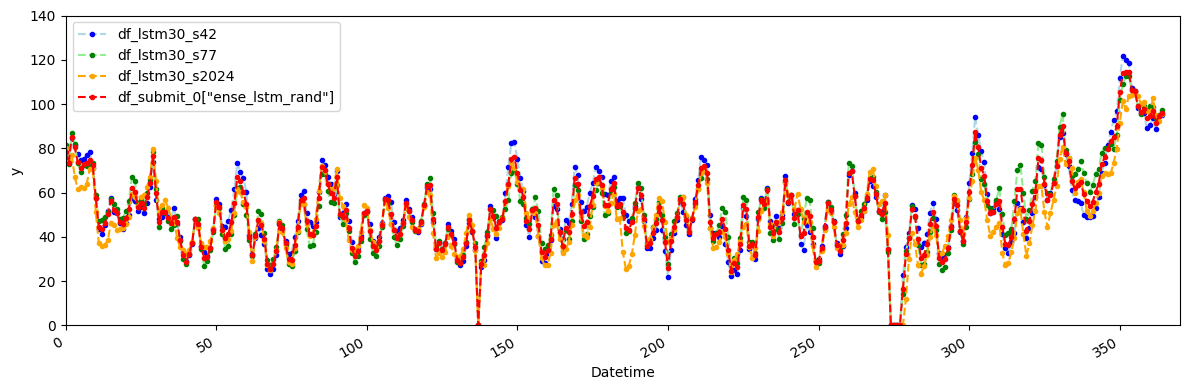

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_lstm30_s42['y'], ls='--', color='lightblue', label='df_lstm30_s42', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30_s77['y'], ls='--', color='lightgreen', label='df_lstm30_s77', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_lstm30_s2024['y'], ls='--', color='orange', label='df_lstm30_s2024', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')
ax.plot(df_submit_0["ense_lstm_rand"], ls='--', color='red', label='df_submit_0["ense_lstm_rand"]', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [46]:
df_submit_0["ense_21_lstm"] = np.nan
df_submit_0["ense_21_lstm"][:-31] = df_prophet21["y"][:-31]*0.7 + df_submit_0["ense_lstm_rand"][:-31]*0.3
df_submit_0["ense_21_lstm"][-31:] = df_prophet21["y"][-31:]*0.9 + df_submit_0["ense_lstm_rand"][-31:]*0.1
df_submit_0["ense_21_lstm"].head()

<ipython-input-46-807152f882ec>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_submit_0["ense_21_lstm"][:-31] = df_prophet21["y"][:-31]*0.7 + df_submit_0["ense_lstm_rand"][:-31]*0.3
<ipython-input-46-807152f882ec>:2: SettingWithCopyWarn

,ense_21_lstm
0,75.539678
1,74.362139
2,74.813777
3,73.627925
4,64.877717


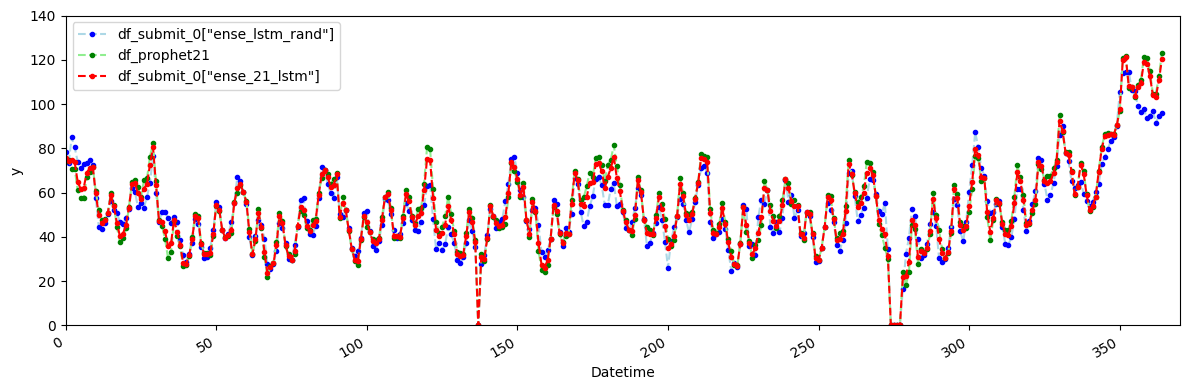

In [47]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_submit_0["ense_lstm_rand"], ls='--', color='lightblue', label='df_submit_0["ense_lstm_rand"]', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_prophet21['y'], ls='--', color='lightgreen', label='df_prophet21', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_submit_0["ense_21_lstm"], ls='--', color='red', label='df_submit_0["ense_21_lstm"]', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [48]:
df_submit = pd.DataFrame({
    'datetime': sample_submit.iloc[:, 0].reset_index(drop=True),
    'y': df_submit_0["ense_21_lstm"].reset_index(drop=True)
})

display(df_submit.head(), df_submit.tail())

,datetime,y
0,2016-04-01,75.539678
1,2016-04-02,74.362139
2,2016-04-03,74.813777
3,2016-04-04,73.627925
4,2016-04-05,64.877717


,datetime,y
360,2017-03-27,112.820194
361,2017-03-28,103.895165
362,2017-03-29,103.399752
363,2017-03-30,110.706244
364,2017-03-31,120.381618


In [49]:
df_submit.to_csv("submit_moving53.csv", index=False, header=False)